In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    log_loss,
    balanced_accuracy_score,
    matthews_corrcoef,
    hamming_loss,
    jaccard_score,
    zero_one_loss
)

%matplotlib inline

In [2]:
df=pd.read_csv("/kaggle/input/placement-data-full-class/Placement_data_full_class.csv")

In [3]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.shape

(215, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
df['salary'].fillna(df['salary'].mean(), inplace=True)

/tmp/ipykernel_35/3850147431.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salary'].fillna(df['salary'].mean(), inplace=True)


In [8]:
numvars = list(df.select_dtypes(include=['int32','int64','float32','float64']).columns)

# 1. Histograms of Numerical Variables

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


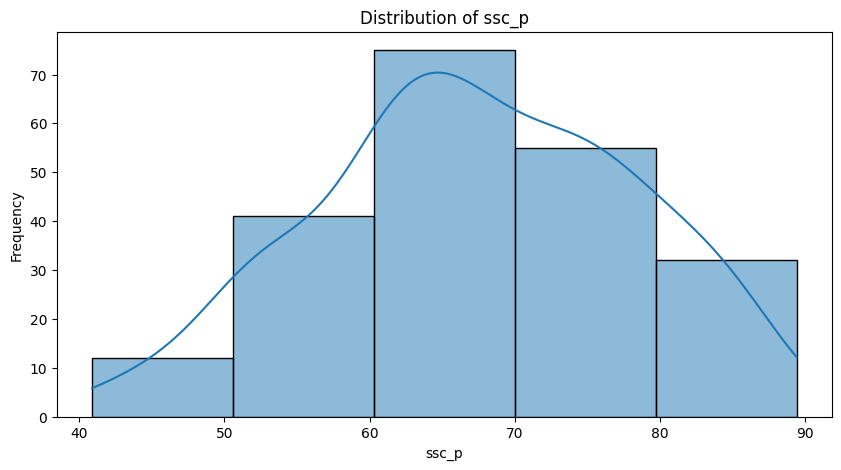

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


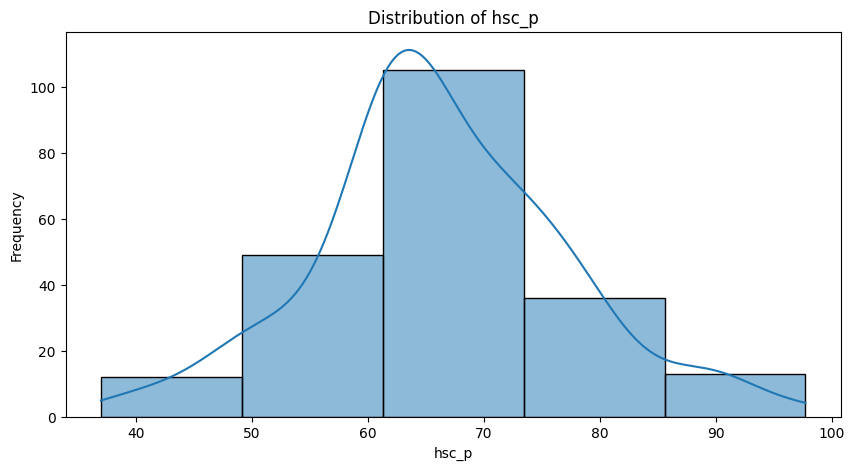

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


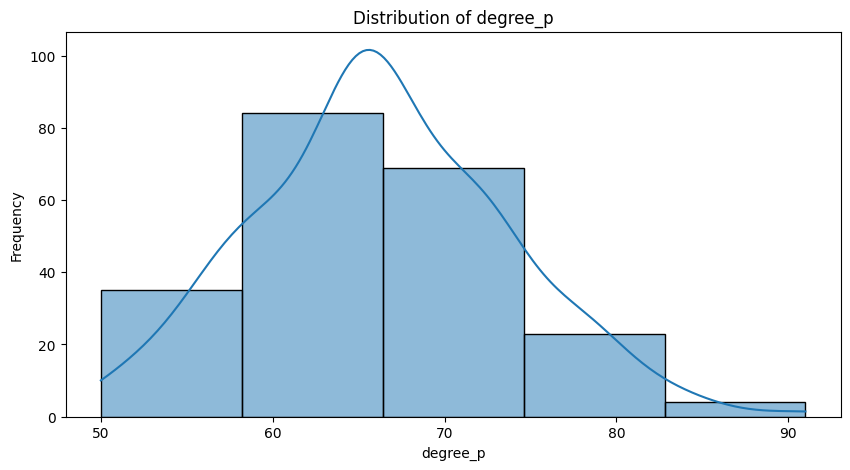

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


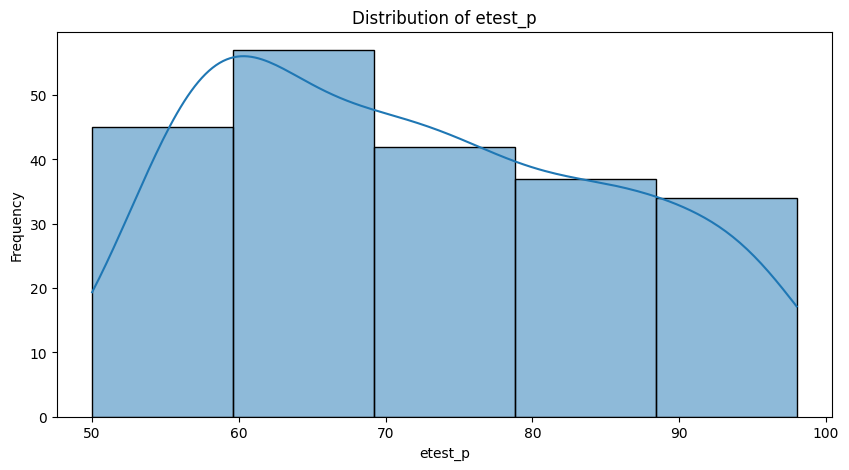

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


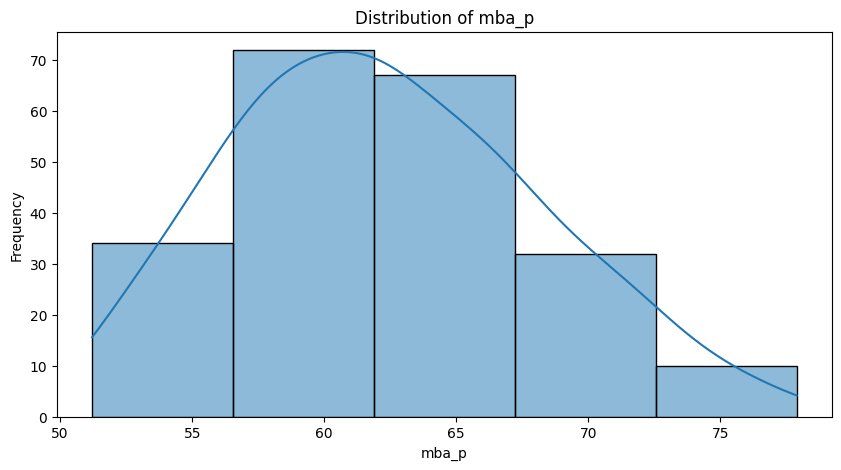

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


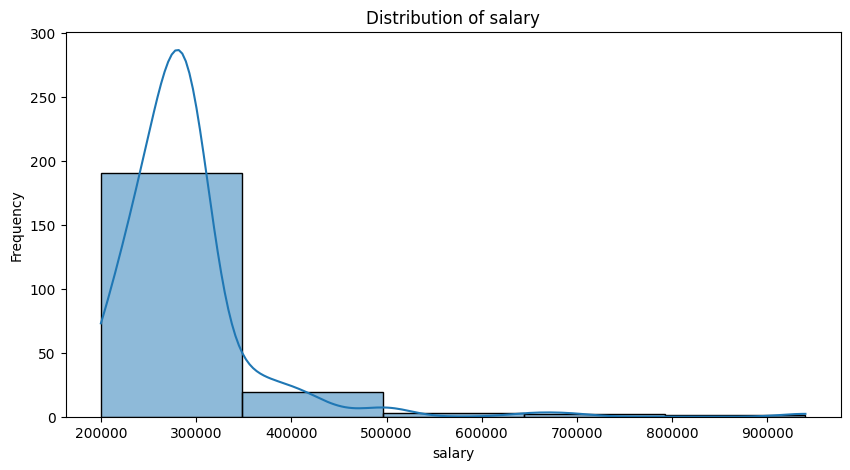

In [9]:
numerical_cols = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
for col in numerical_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], bins=5, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


# 2. Box Plots of Numerical Variables by Status

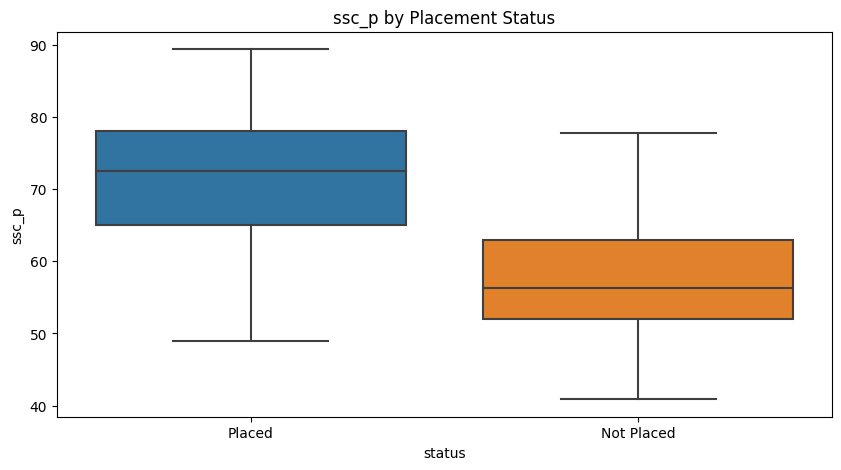

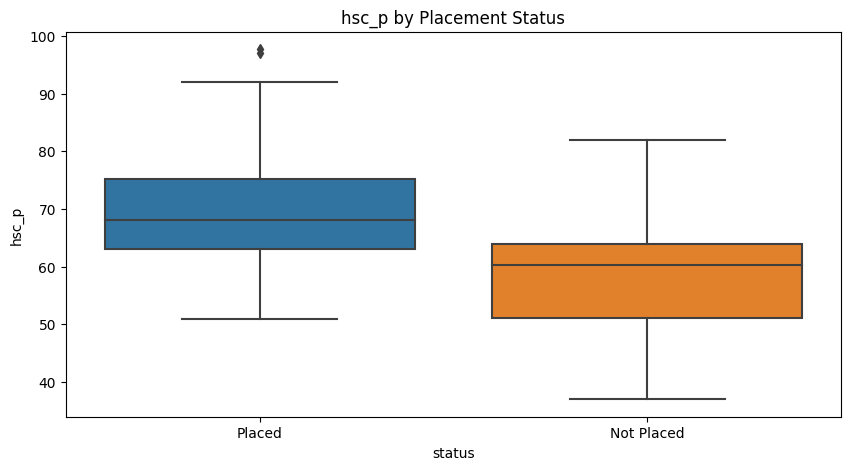

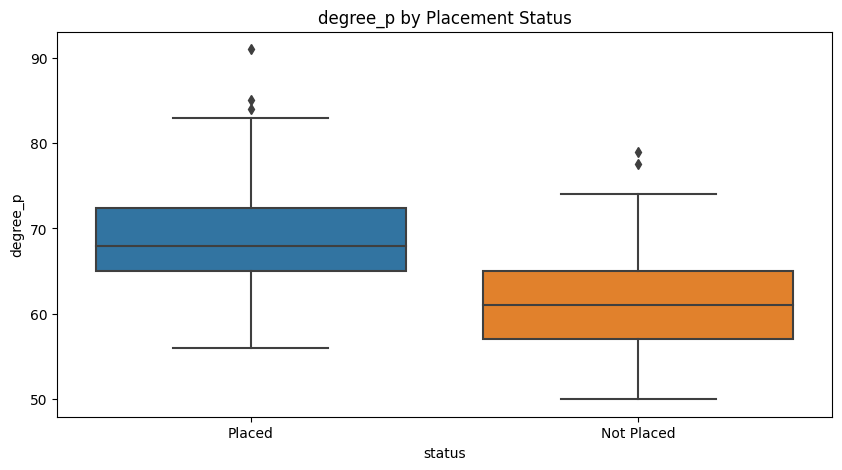

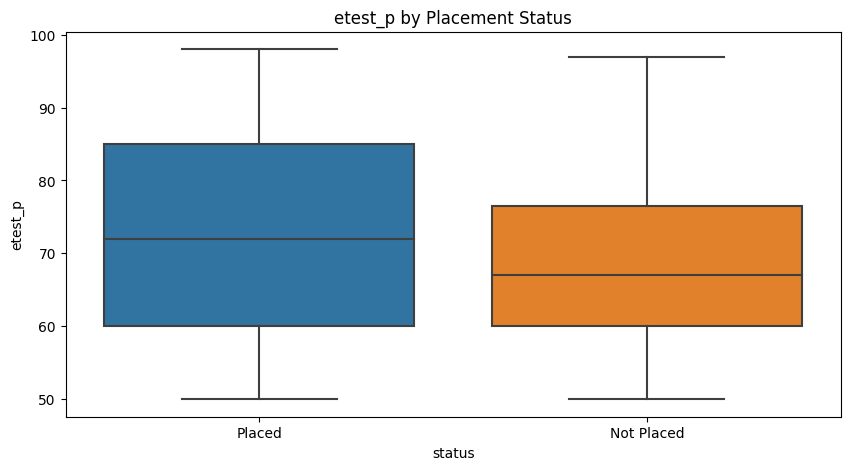

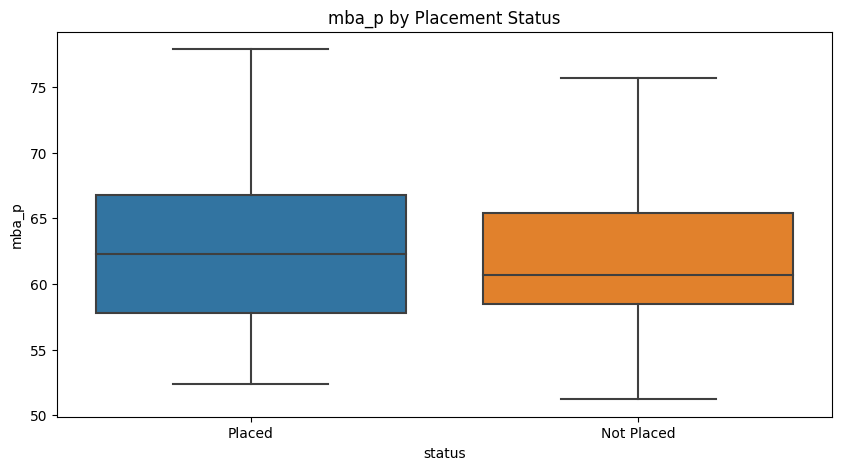

In [10]:
for col in numerical_cols[:-1]:  # Exclude salary
    plt.figure(figsize=(10,5))
    sns.boxplot(x='status', y=col, data=df)
    plt.title(f'{col} by Placement Status')
    plt.show()

# 3. Bar Plots of Categorical Variables vs. Status

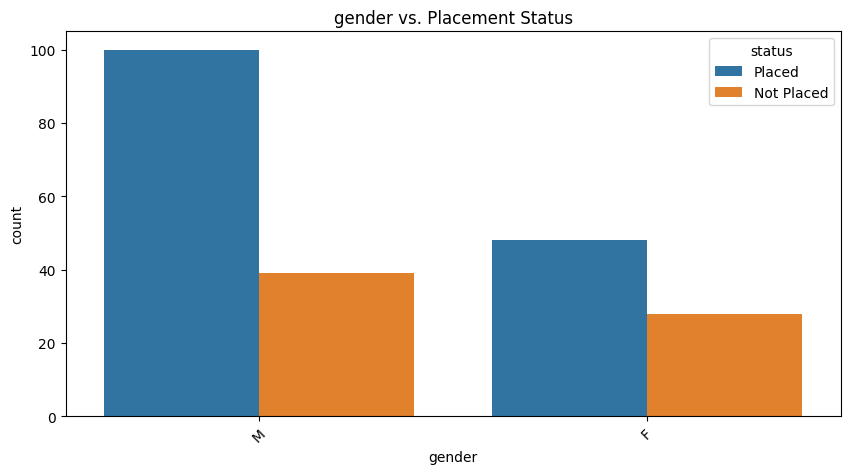

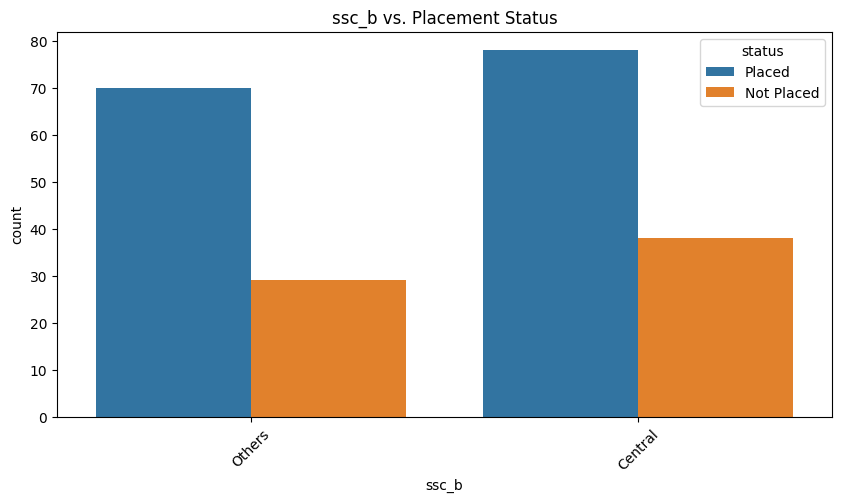

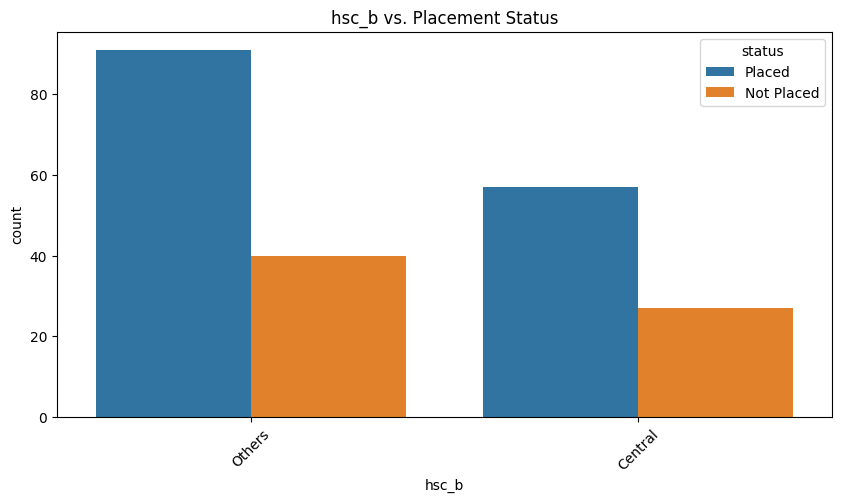

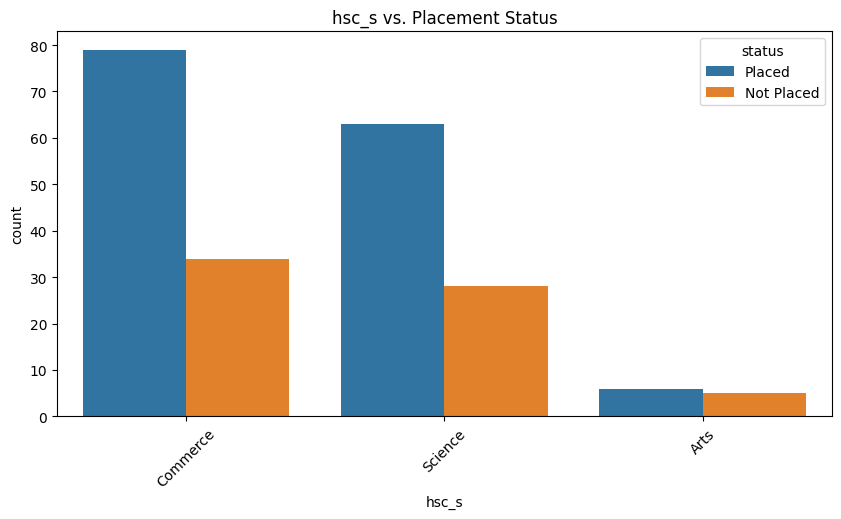

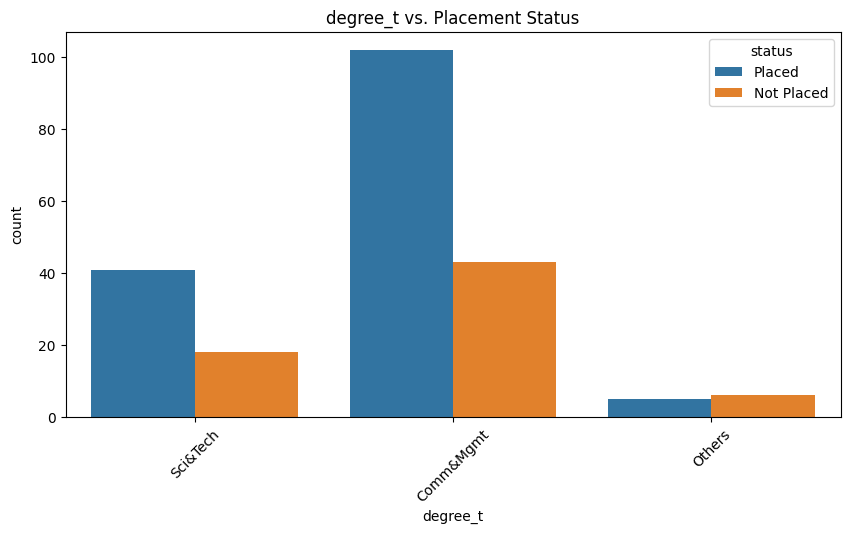

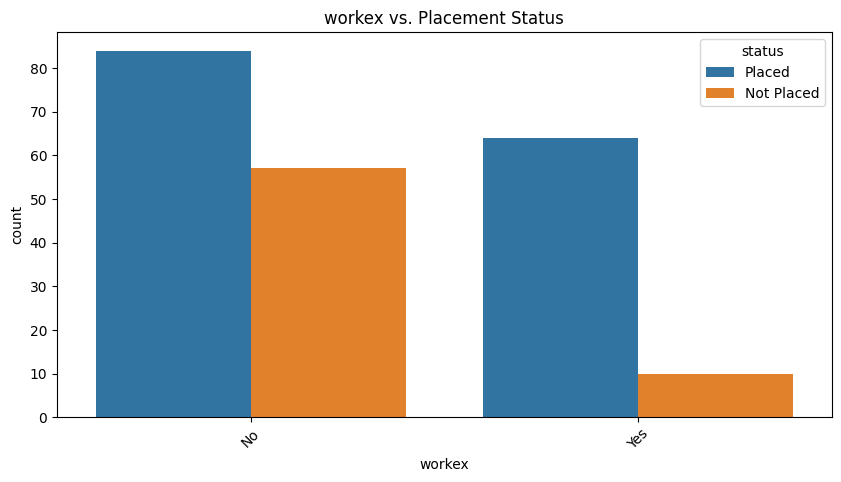

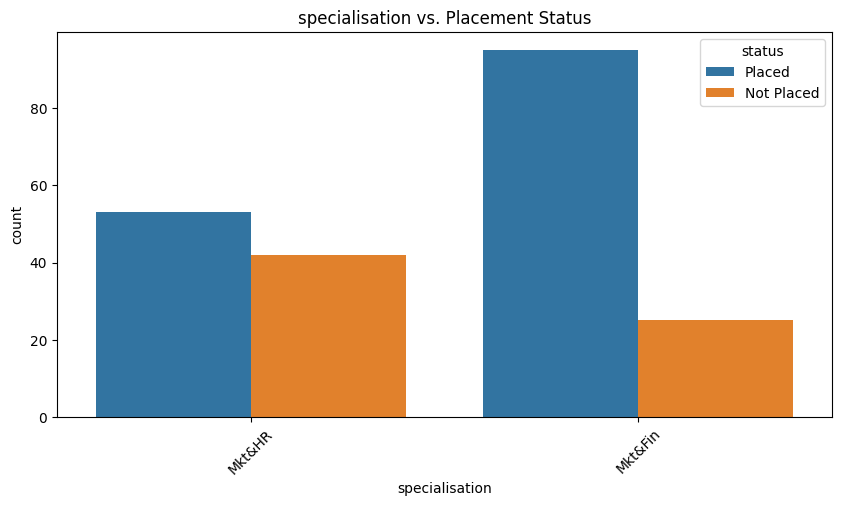

In [11]:
categorical_cols = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']
for col in categorical_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, hue='status', data=df)
    plt.title(f'{col} vs. Placement Status')
    plt.xticks(rotation=45)
    plt.show()

# 4. Pair Plot of Numerical Variables

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

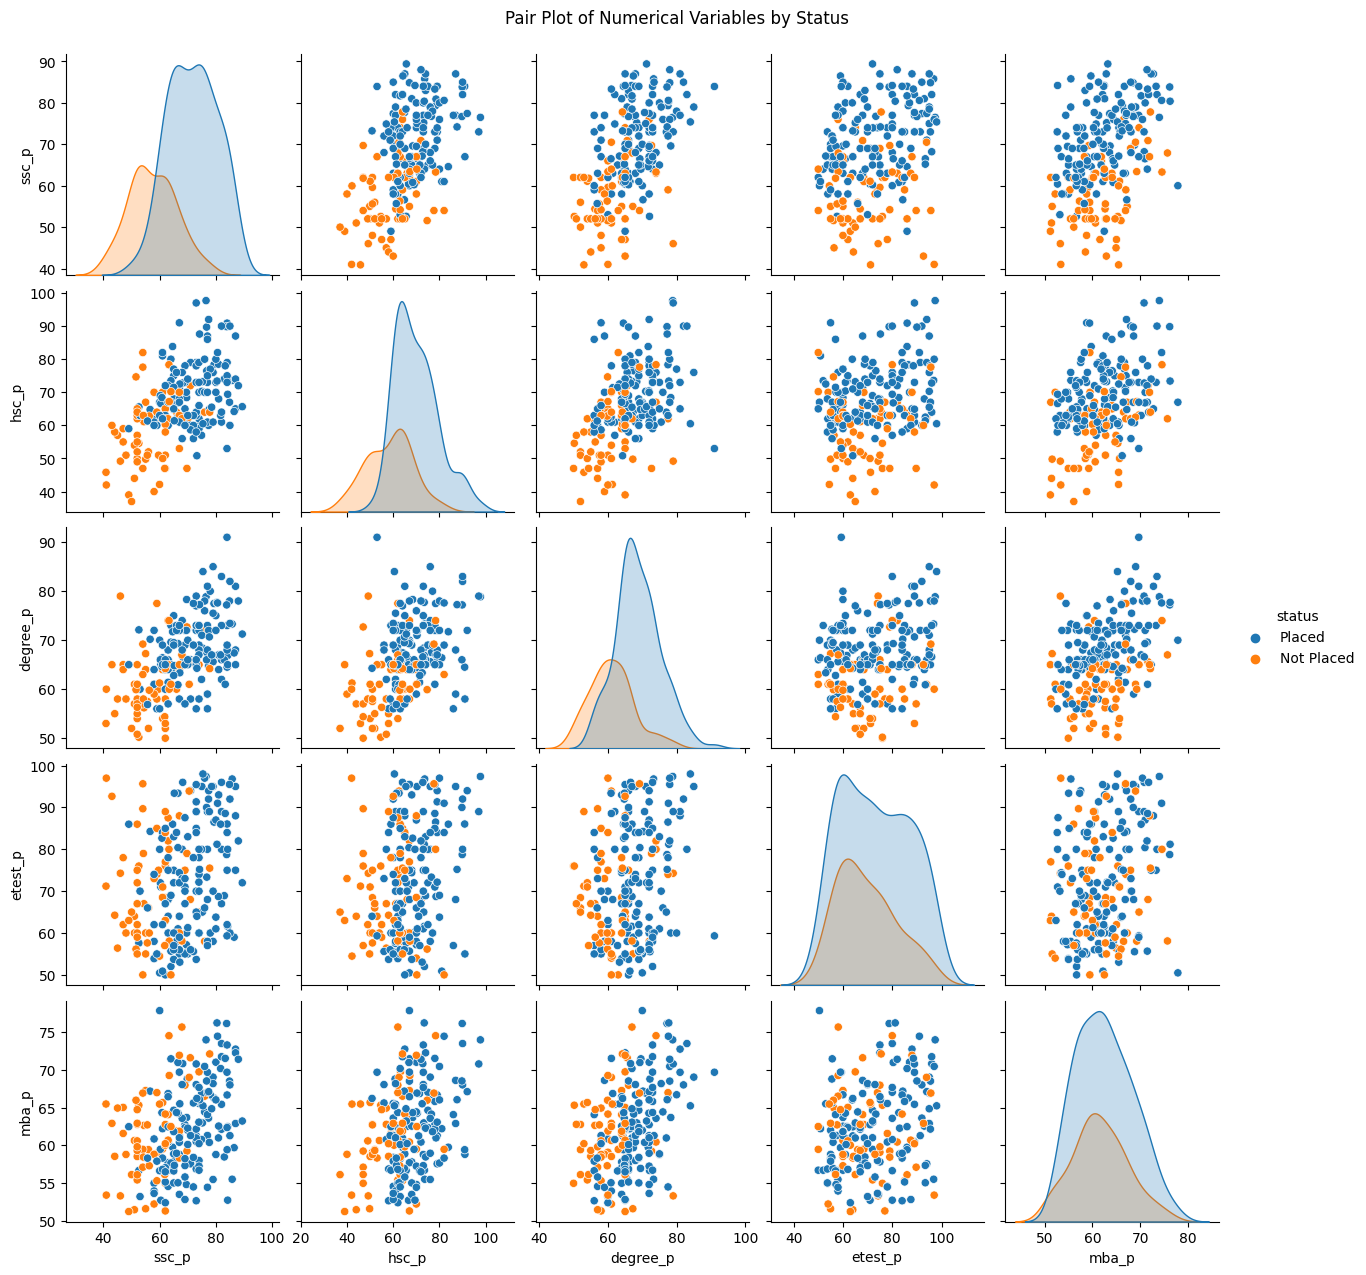

In [12]:
sns.pairplot(df, vars=numerical_cols[:-1], hue='status')
plt.suptitle('Pair Plot of Numerical Variables by Status', y=1.02)
plt.show()

# 5. Correlation Heatmap

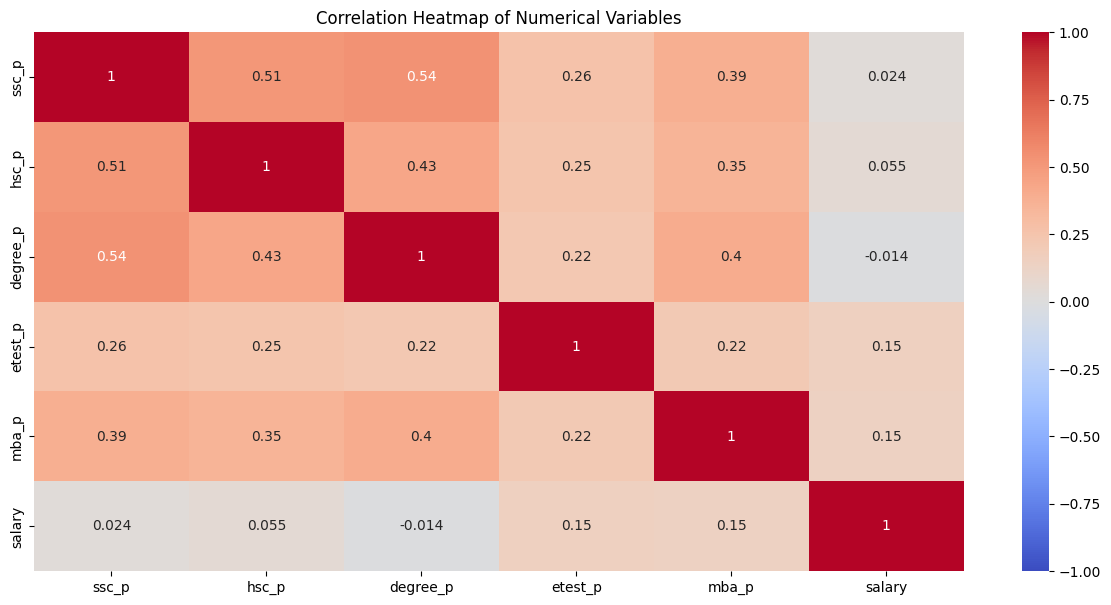

In [13]:
plt.figure(figsize=(15,7))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


# 6. Violin Plot of Salary by Specialisation

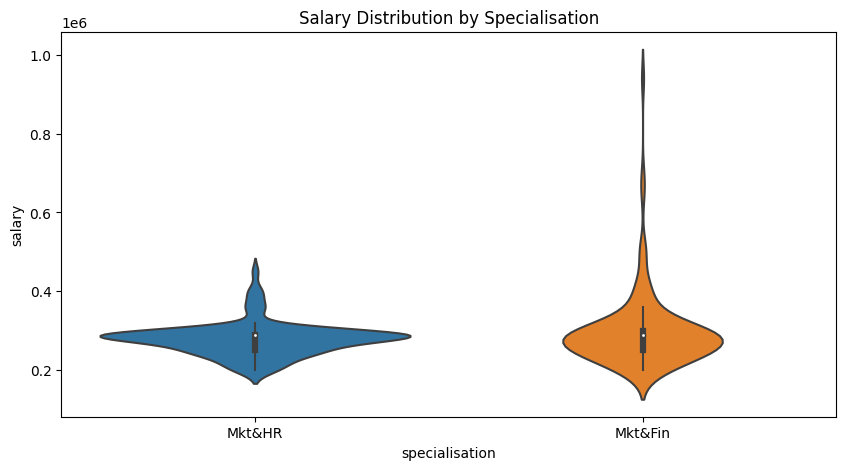

In [14]:
plt.figure(figsize=(10,5))
sns.violinplot(x='specialisation', y='salary', data=df)
plt.title('Salary Distribution by Specialisation')
plt.show()


# 7. Scatter Plot of SSC vs. HSC Percentage by Status

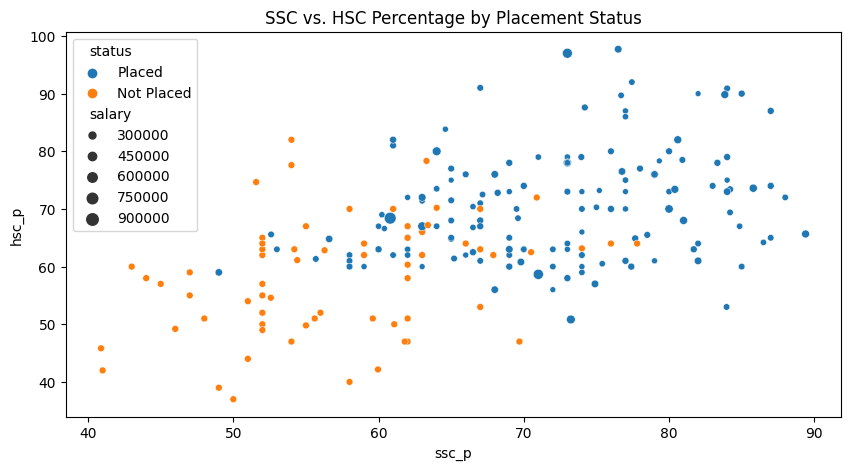

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='ssc_p', y='hsc_p', hue='status', size='salary', data=df)
plt.title('SSC vs. HSC Percentage by Placement Status')
plt.show()

# 8. Bar Plot of Average Salary by Work Experience

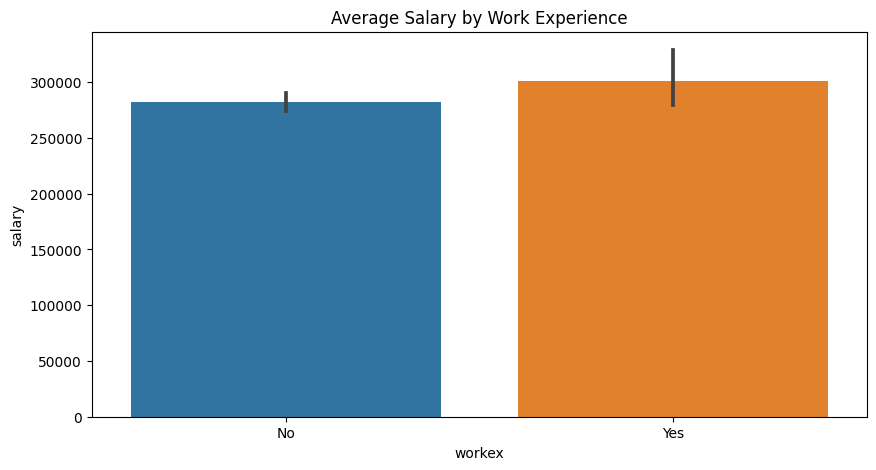

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x='workex', y='salary', data=df)
plt.title('Average Salary by Work Experience')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

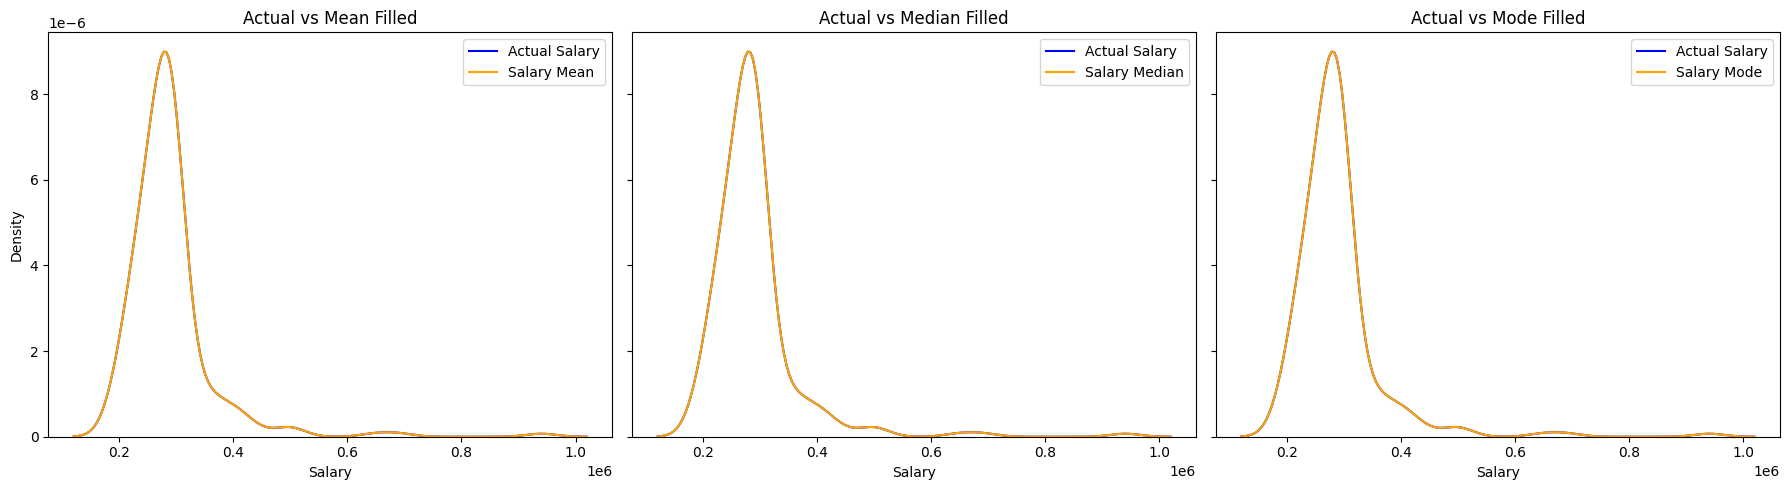

In [17]:
# Fill nulls (if not done already)
df['salary_mean'] = df['salary'].fillna(df['salary'].mean())
df['salary_median'] = df['salary'].fillna(df['salary'].median())
df['salary_mode'] = df['salary'].fillna(df['salary'].mode()[0])

# Columns to compare
sallist = ['salary_mean', 'salary_median', 'salary_mode']
titles = ['Actual vs Mean Filled', 'Actual vs Median Filled', 'Actual vs Mode Filled']

# Subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, sal in enumerate(sallist):
    sns.kdeplot(df['salary'].dropna(), label='Actual Salary', ax=axes[i], color='blue',cbar=True)
    sns.kdeplot(df[sal], label=sal.replace('_', ' ').title(), ax=axes[i], color='orange')
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Salary')
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.tight_layout()
plt.show()


In [18]:
df.drop(columns=["salary_mean","salary_mode","salary_median","sl_no"],axis=1,inplace=True)

# top science students placed

In [19]:
top5 = df[(df['degree_t'] == 'Sci&Tech') & (df['status'] == 'Placed')] \
         .sort_values(by='salary', ascending=False) \
         .reset_index(drop=True) \
         .head(5)

top5.style.background_gradient(cmap='winter')


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,71.000000,Central,58.660000,Central,Science,58.000000,Sci&Tech,Yes,56.000000,Mkt&Fin,61.300000,Placed,690000.000000
1,M,73.240000,Others,50.830000,Others,Science,64.270000,Sci&Tech,Yes,64.000000,Mkt&Fin,66.230000,Placed,500000.000000
2,M,63.000000,Others,67.000000,Others,Science,64.000000,Sci&Tech,No,75.000000,Mkt&Fin,66.460000,Placed,500000.000000
3,M,64.000000,Others,80.000000,Others,Science,65.000000,Sci&Tech,Yes,69.000000,Mkt&Fin,57.650000,Placed,500000.000000
4,M,80.000000,Others,70.000000,Others,Science,72.000000,Sci&Tech,No,87.000000,Mkt&HR,71.040000,Placed,450000.000000


# top Comm&Mgt students placed

In [20]:
top_5=df[(df['degree_t']=='Comm&Mgmt')&(df['status']=='Placed')].sort_values(by = 'salary',ascending = False).reset_index().head(5)
top_5.style.background_gradient(cmap="gnuplot")
 

,index,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,119,M,60.800000,Central,68.400000,Central,Commerce,64.600000,Comm&Mgmt,Yes,82.660000,Mkt&Fin,64.340000,Placed,940000.000000
1,177,F,73.000000,Central,97.000000,Others,Commerce,79.000000,Comm&Mgmt,Yes,89.000000,Mkt&Fin,70.810000,Placed,650000.000000
2,4,M,85.800000,Central,73.600000,Central,Commerce,73.300000,Comm&Mgmt,No,96.800000,Mkt&Fin,55.500000,Placed,425000.000000
3,95,M,73.000000,Central,78.000000,Others,Commerce,65.000000,Comm&Mgmt,Yes,95.460000,Mkt&Fin,62.160000,Placed,420000.000000
4,210,M,80.600000,Others,82.000000,Others,Commerce,77.600000,Comm&Mgmt,No,91.000000,Mkt&Fin,74.490000,Placed,400000.000000


# max and min salary
# observation : max salary : 9,40,000 and min salary : 2,00,000

In [21]:
max_min=df[(df['salary']==max(df['salary'])) | (df['salary']==min(df['salary']))]
max_min.style.background_gradient(cmap="Dark2")

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,M,79.330000,Central,78.330000,Others,Science,77.480000,Sci&Tech,Yes,86.500000,Mkt&Fin,66.280000,Placed,200000.000000
15,F,65.000000,Central,75.000000,Central,Commerce,69.000000,Comm&Mgmt,Yes,72.000000,Mkt&Fin,64.660000,Placed,200000.000000
44,F,77.000000,Others,73.000000,Others,Commerce,81.000000,Comm&Mgmt,Yes,89.000000,Mkt&Fin,69.700000,Placed,200000.000000
50,F,75.200000,Central,73.200000,Central,Science,68.400000,Comm&Mgmt,No,65.000000,Mkt&HR,62.980000,Placed,200000.000000
107,M,82.000000,Others,90.000000,Others,Commerce,83.000000,Comm&Mgmt,No,80.000000,Mkt&HR,73.520000,Placed,200000.000000
119,M,60.800000,Central,68.400000,Central,Commerce,64.600000,Comm&Mgmt,Yes,82.660000,Mkt&Fin,64.340000,Placed,940000.000000
135,F,72.000000,Central,56.000000,Others,Science,69.000000,Comm&Mgmt,No,55.600000,Mkt&HR,65.630000,Placed,200000.000000


# students with salary more than avg salary science dept

In [22]:

avg_salary=df[(df['degree_t']=='Sci&Tech')&(df['salary']>df['salary'].mean())].sort_values(by = 'salary',ascending = False).reset_index()
avg_salary.style.background_gradient(cmap="Accent")

,index,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,150,M,71.000000,Central,58.660000,Central,Science,58.000000,Sci&Tech,Yes,56.000000,Mkt&Fin,61.300000,Placed,690000.000000
1,77,M,64.000000,Others,80.000000,Others,Science,65.000000,Sci&Tech,Yes,69.000000,Mkt&Fin,57.650000,Placed,500000.000000
2,163,M,63.000000,Others,67.000000,Others,Science,64.000000,Sci&Tech,No,75.000000,Mkt&Fin,66.460000,Placed,500000.000000
3,174,M,73.240000,Others,50.830000,Others,Science,64.270000,Sci&Tech,Yes,64.000000,Mkt&Fin,66.230000,Placed,500000.000000
4,53,M,80.000000,Others,70.000000,Others,Science,72.000000,Sci&Tech,No,87.000000,Mkt&HR,71.040000,Placed,450000.000000
5,39,M,81.000000,Others,68.000000,Others,Science,64.000000,Sci&Tech,No,93.000000,Mkt&Fin,62.560000,Placed,411000.000000
6,128,M,80.400000,Central,73.400000,Central,Science,77.720000,Sci&Tech,Yes,81.200000,Mkt&HR,76.260000,Placed,400000.000000
7,145,M,89.400000,Others,65.660000,Others,Science,71.250000,Sci&Tech,No,72.000000,Mkt&HR,63.230000,Placed,400000.000000
8,24,M,76.500000,Others,97.700000,Others,Science,78.860000,Sci&Tech,No,97.400000,Mkt&Fin,74.010000,Placed,360000.000000
9,22,F,69.800000,Others,60.800000,Others,Science,72.230000,Sci&Tech,No,55.530000,Mkt&HR,68.810000,Placed,360000.000000


# maximum students placed are from comm&mgt

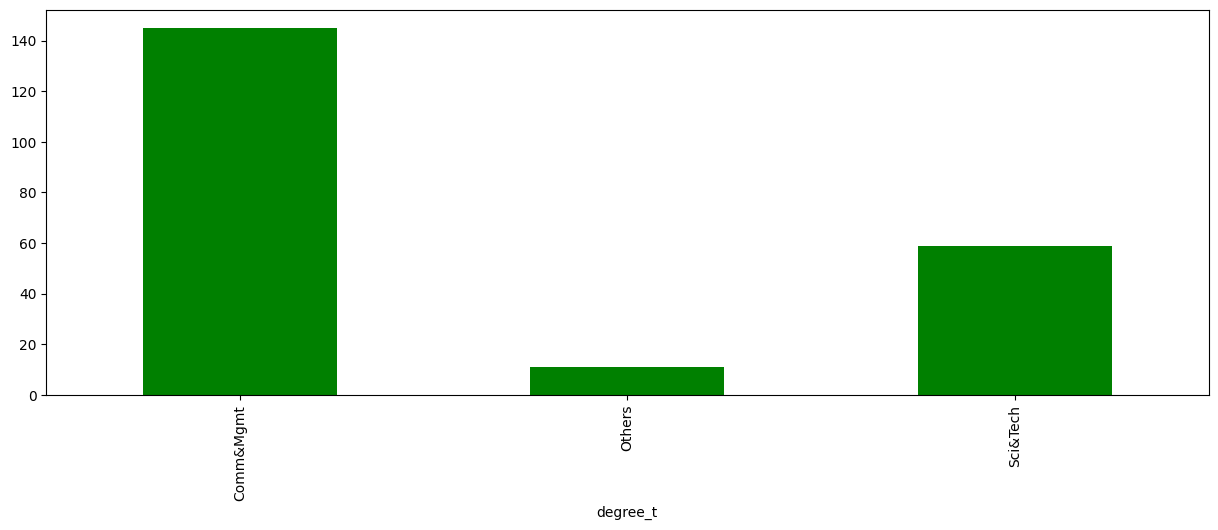

In [23]:
df.groupby(["degree_t"])["status"].count().plot(kind="bar",color="green",figsize=(15,5))
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns automatically (object or categorical dtype)
cat_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Dictionary to store mappings
getmappings = {}

# Label encode each categorical column
le = LabelEncoder()

for col in cat_columns:
    df[col] = le.fit_transform(df[col])
    # Store mapping as dict {category: encoded_value}
    getmappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    
    # Print the mapping for the column
    print(f"Mapping for column '{col}':")
    for k, v in getmappings[col].items():
        print(f"  {k} -> {v}")
    print("\n")  # newline for readability


Mapping for column 'gender':
  F -> 0
  M -> 1


Mapping for column 'ssc_b':
  Central -> 0
  Others -> 1


Mapping for column 'hsc_b':
  Central -> 0
  Others -> 1


Mapping for column 'hsc_s':
  Arts -> 0
  Commerce -> 1
  Science -> 2


Mapping for column 'degree_t':
  Comm&Mgmt -> 0
  Others -> 1
  Sci&Tech -> 2


Mapping for column 'workex':
  No -> 0
  Yes -> 1


Mapping for column 'specialisation':
  Mkt&Fin -> 0
  Mkt&HR -> 1


Mapping for column 'status':
  Not Placed -> 0
  Placed -> 1




Distribution plots for ssc_p:


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


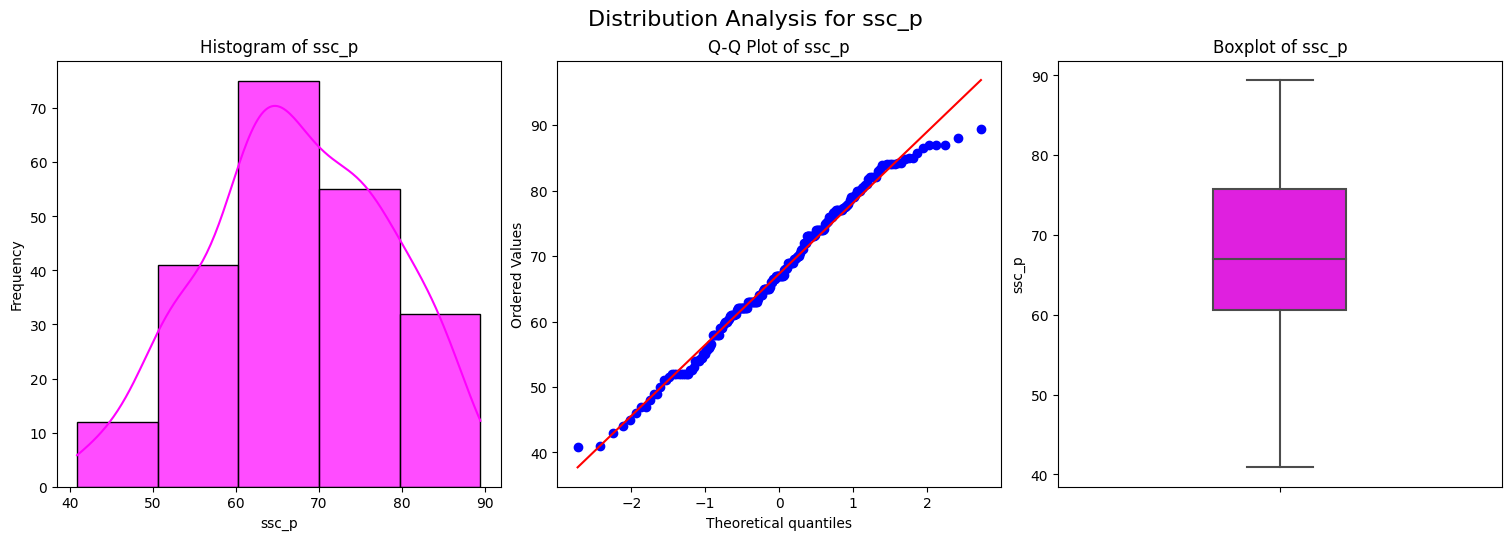

Distribution plots for hsc_p:


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


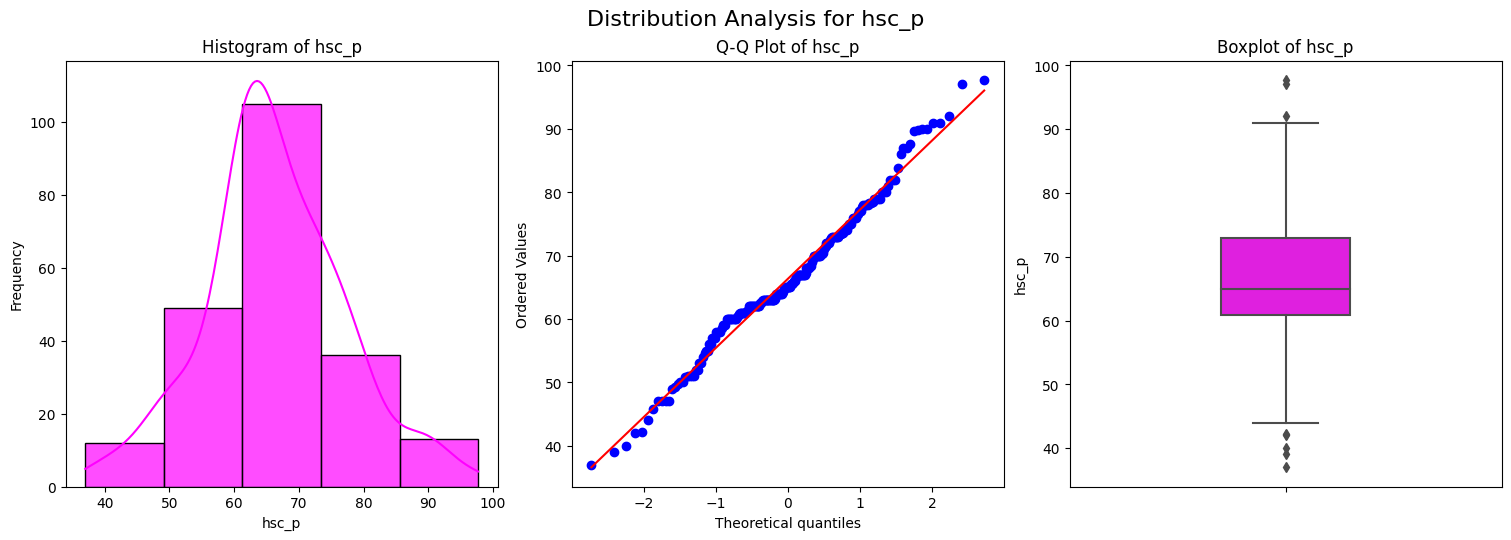

Distribution plots for degree_p:


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


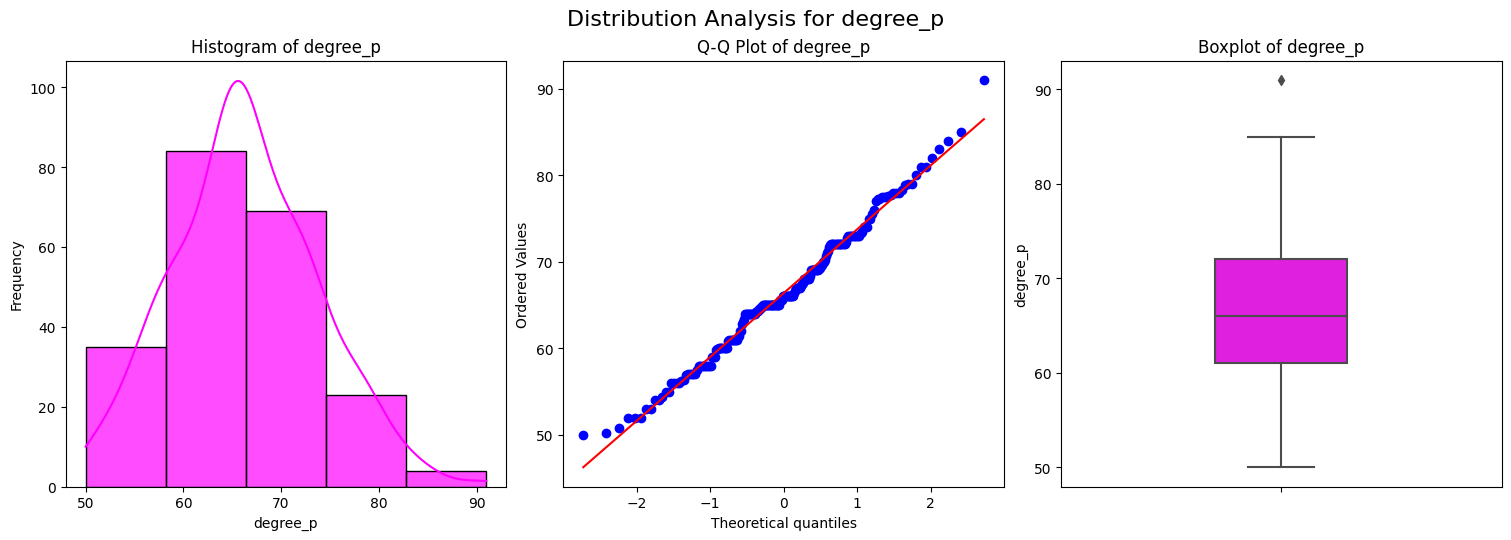

Distribution plots for etest_p:


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


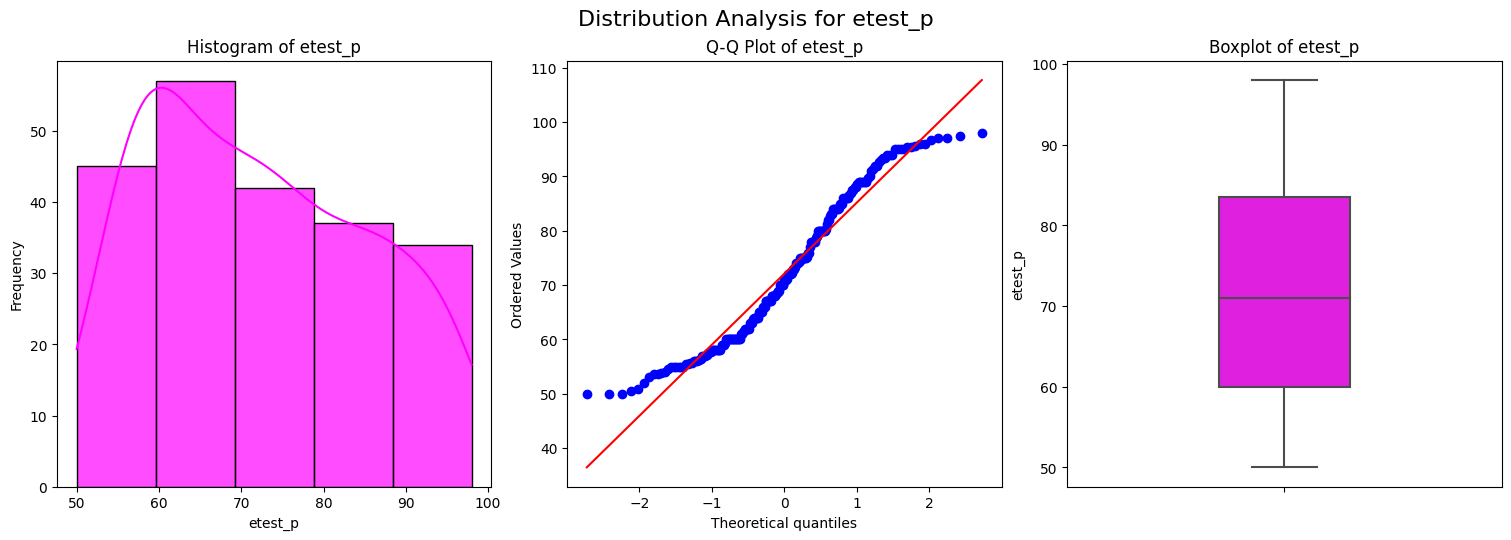

Distribution plots for mba_p:


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


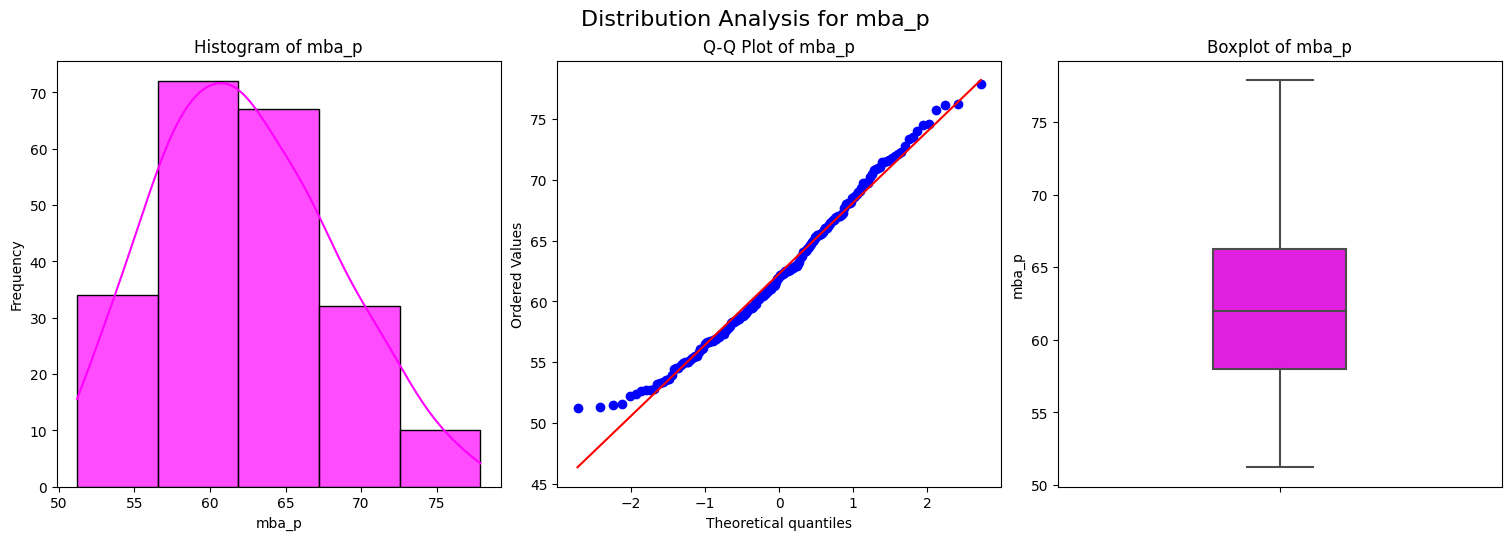

Distribution plots for salary:


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


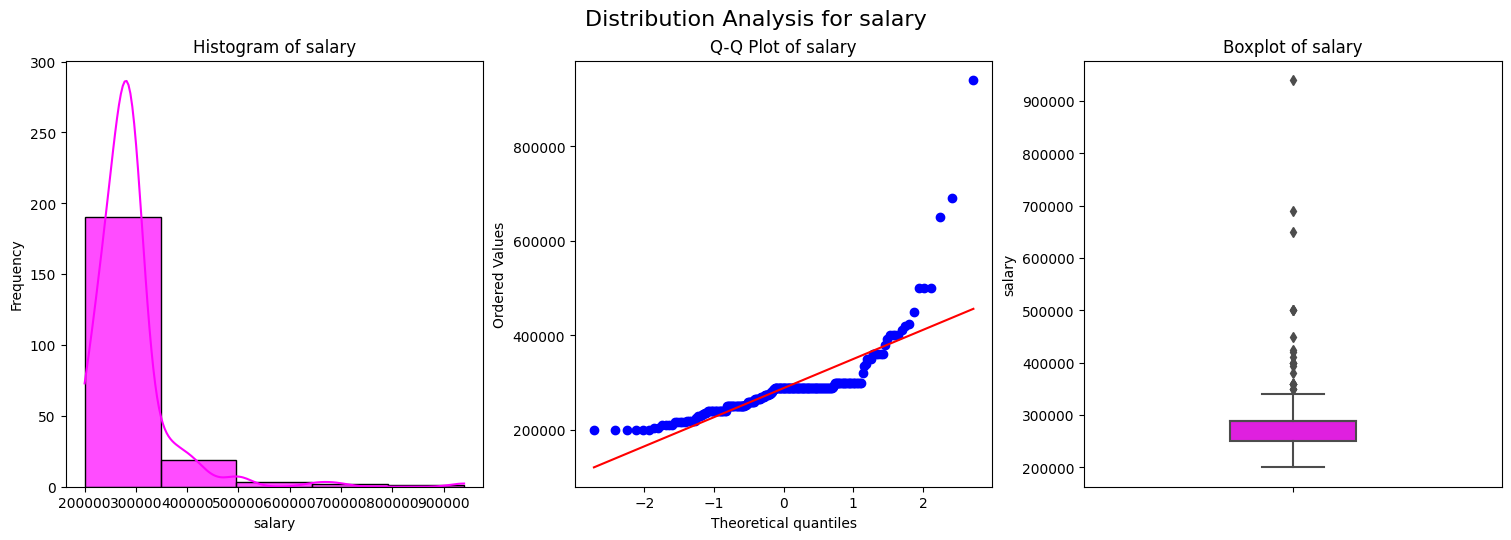

In [25]:
import scipy.stats as stats

# Enhanced getplots function
def getplots(df, col):
    fig = plt.figure(figsize=(15, 5), constrained_layout=True)
    
    # Subplot 1: Histogram with KDE
    plt.subplot(1, 3, 1)
    sns.histplot(df[col], bins=5, kde=True, color='magenta', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Subplot 2: Q-Q Plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[col], dist='norm', plot=plt)
    plt.title(f'Q-Q Plot of {col}')
    
    # Subplot 3: Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[col], color='magenta', width=0.3)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    
    plt.suptitle(f'Distribution Analysis for {col}', fontsize=16, y=1.05)
    plt.show()

# Generate plots for numerical variables (excluding sl_no)
for col in numvars[1:]:
    print(f'Distribution plots for {col}:')
    getplots(df, col)
    print('=' * 50)

In [26]:
df.drop(columns=["salary"],axis=1,inplace=True)

In [27]:
X=df.drop(columns=["status"],axis=1)
y=df["status"]


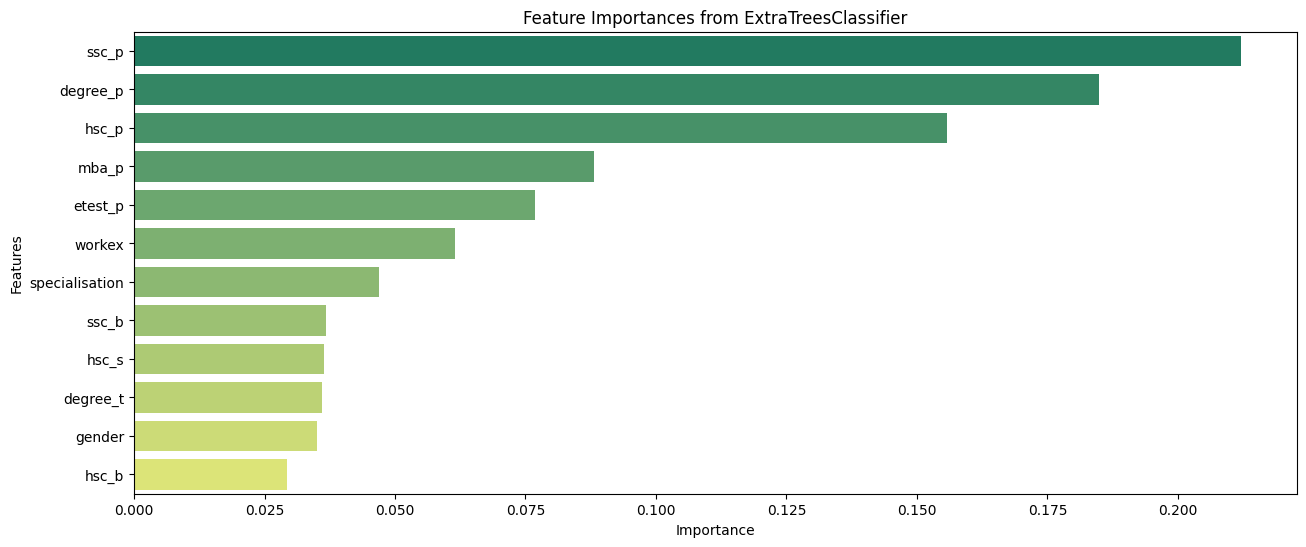

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
ec = ExtraTreesClassifier(random_state=42)
ec.fit(X, y)

# Get feature importances and sort
feat_importances = pd.Series(ec.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

# Plot with seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x=feat_importances.values, y=feat_importances.index, palette="summer")
plt.title("Feature Importances from ExtraTreesClassifier")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

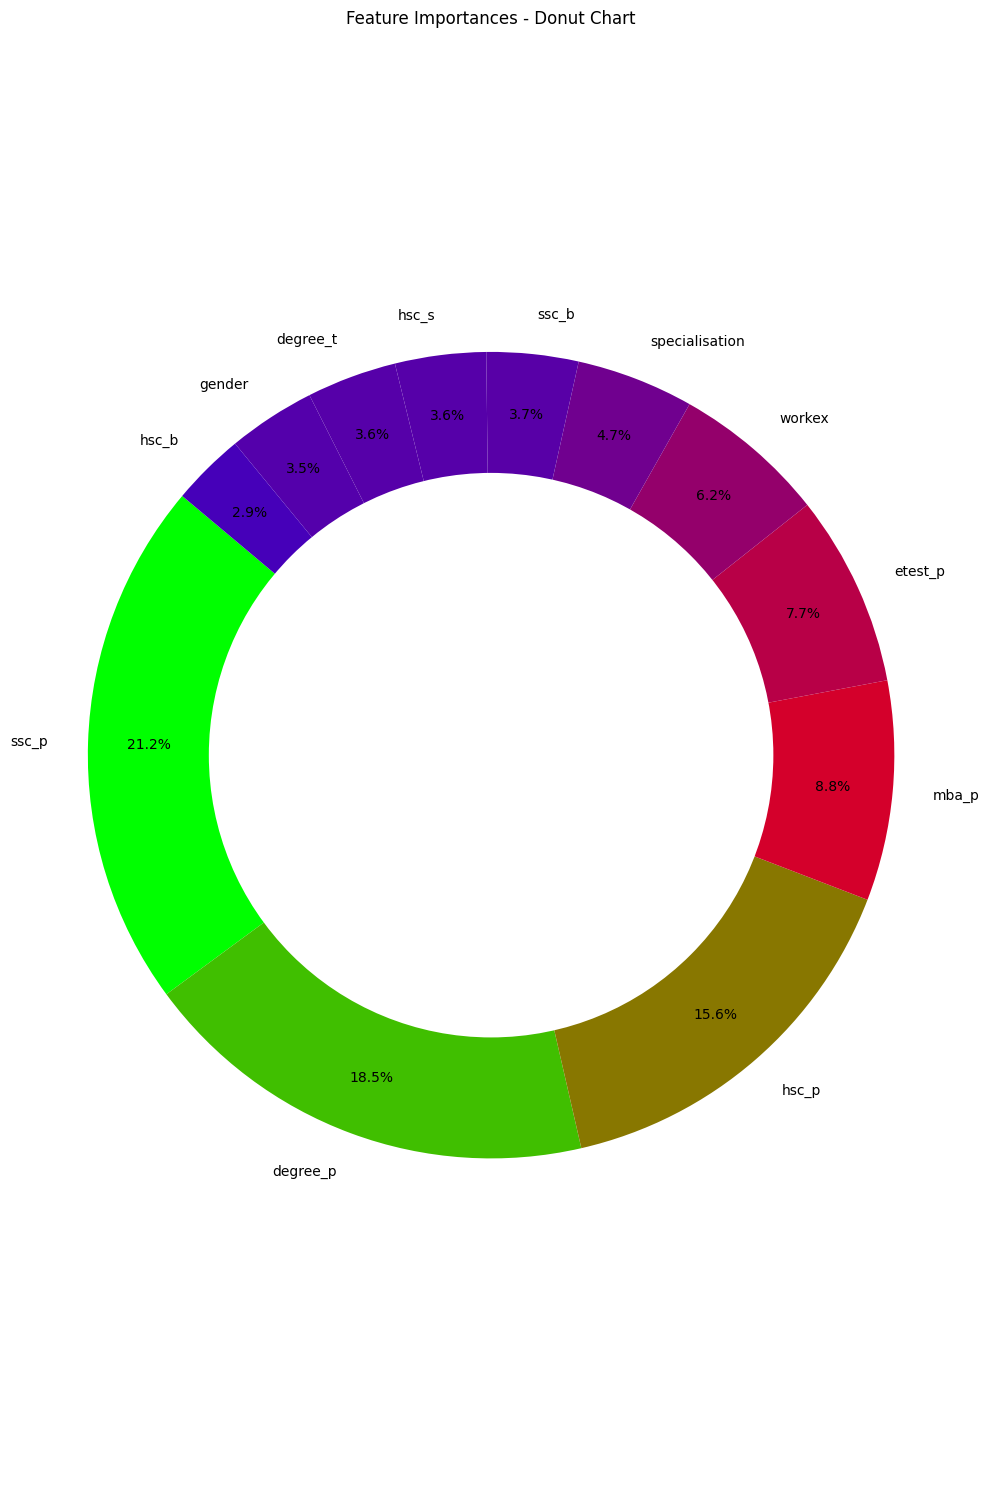

In [29]:
plt.figure(figsize=(10, 15))
plt.pie(feat_importances, labels=feat_importances.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=plt.cm.brg(feat_importances / max(feat_importances)))

# Draw circle for donut shape
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis("equal")
plt.title('Feature Importances - Donut Chart')
plt.tight_layout()
plt.show()

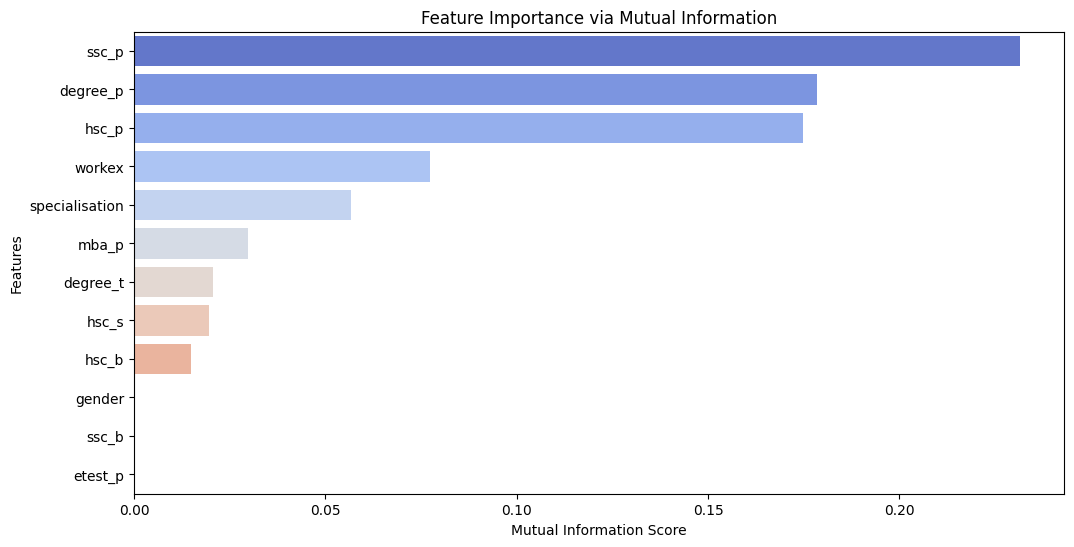

In [30]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Create a Series with feature names and their MI scores
mi_scores_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=mi_scores_series.values, y=mi_scores_series.index, palette="coolwarm")
plt.title("Feature Importance via Mutual Information")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.show()


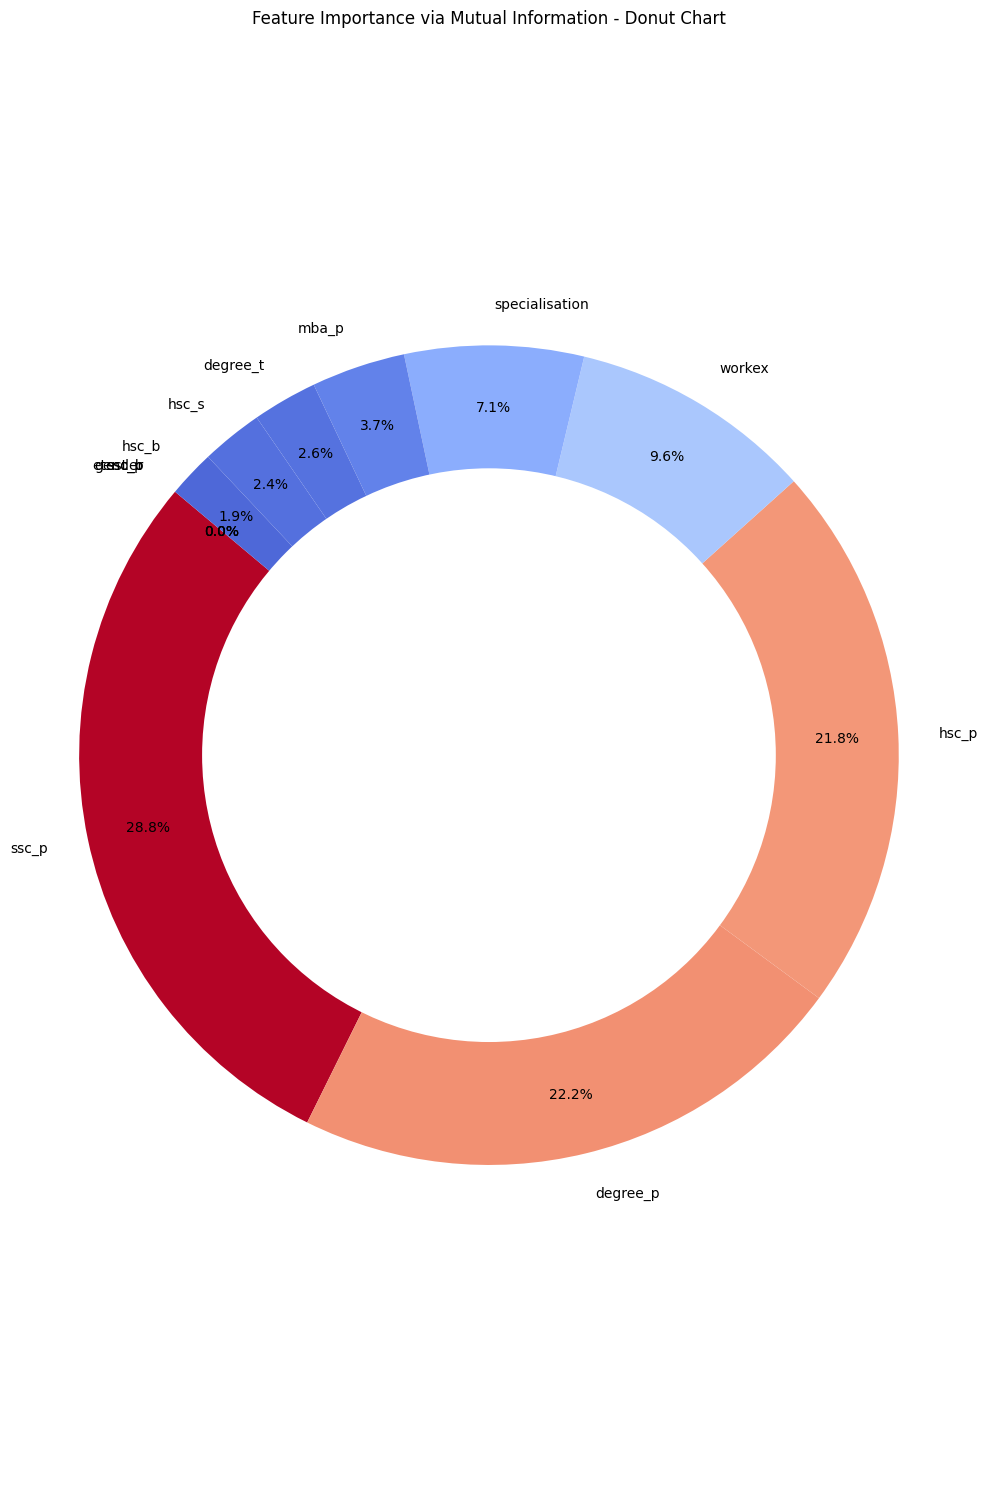

In [31]:
plt.figure(figsize=(10,15))
plt.pie(
    mi_scores_series, 
    labels=mi_scores_series.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    pctdistance=0.85, 
    colors=plt.cm.coolwarm(mi_scores_series / max(mi_scores_series))
)

# Draw circle in center for donut effect
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis("equal")
plt.title('Feature Importance via Mutual Information - Donut Chart')
plt.tight_layout()
plt.show()

In [32]:
df=df[["gender","mba_p","ssc_p","degree_p","specialisation","hsc_p","degree_t","workex","status"]]
df.head()

,gender,mba_p,ssc_p,degree_p,specialisation,hsc_p,degree_t,workex,status
0,1,58.80,67.00,58.00,1,91.00,2,0,1
1,1,66.28,79.33,77.48,0,78.33,2,1,1
2,1,57.80,65.00,64.00,0,68.00,0,0,1
3,1,59.43,56.00,52.00,1,52.00,2,0,0
4,1,55.50,85.80,73.30,0,73.60,0,0,1


In [33]:
df[df["status"]==1]

,gender,mba_p,ssc_p,degree_p,specialisation,hsc_p,degree_t,workex,status
0,1,58.80,67.00,58.00,1,91.00,2,0,1
1,1,66.28,79.33,77.48,0,78.33,2,1,1
2,1,57.80,65.00,64.00,0,68.00,0,0,1
4,1,55.50,85.80,73.30,0,73.60,0,0,1
7,1,62.14,82.00,66.00,0,64.00,2,1,1
...,...,...,...,...,...,...,...,...,...
209,1,56.49,62.00,65.00,0,72.00,0,0,1
210,1,74.49,80.60,77.60,0,82.00,0,0,1
211,1,53.62,58.00,72.00,0,60.00,2,0,1
212,1,69.72,67.00,73.00,0,67.00,0,1,1


In [34]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from scipy.stats import uniform, randint

X=df.drop(columns=["status"],axis=1)
y=df["status"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

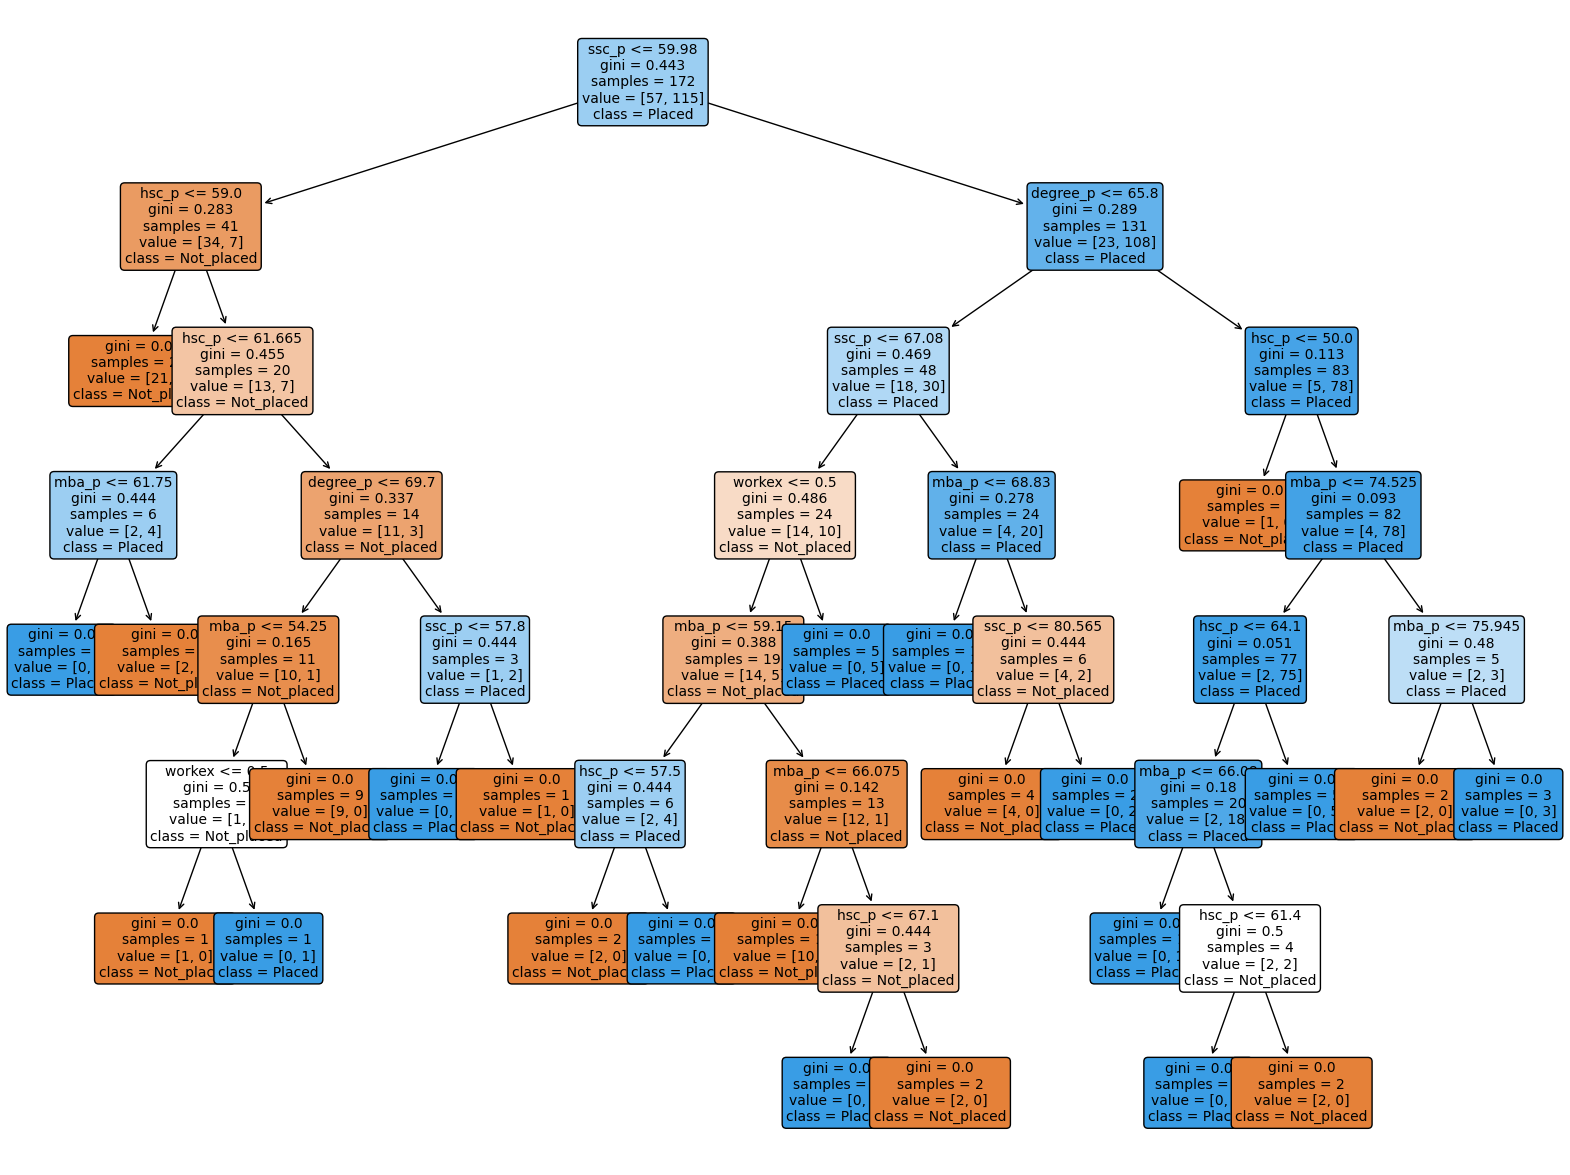

In [35]:
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)
plt.figure(figsize=(20, 15))
tree.plot_tree(
    dc, 
    filled=True, 
    class_names=['Not_placed', 'Placed'], 
    feature_names=X_train.columns,
    rounded=True,
    fontsize=10
)
plt.show()

Optimal ccp_alpha: 0.007551
Train accuracy at optimal ccp_alpha: 0.9767
Test accuracy at optimal ccp_alpha: 0.8837


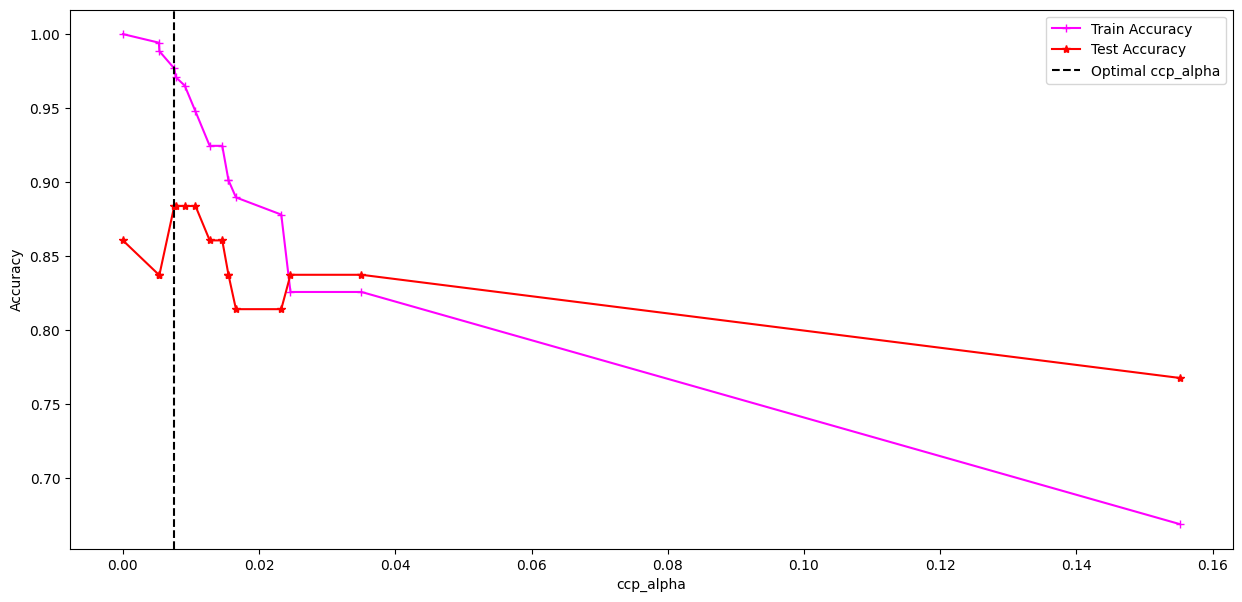

In [36]:
cost_path = dc.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = cost_path.ccp_alphas

# Train models for each ccp_alpha
modellist = [DecisionTreeClassifier(ccp_alpha=alpha).fit(X_train, y_train) for alpha in ccp_alphas]

# Compute train and test accuracies
train_scores = [clf.score(X_train, y_train) for clf in modellist]
test_scores = [clf.score(X_test, y_test) for clf in modellist]

# Find optimal ccp_alpha based on test accuracy
optimal_idx = np.argmax(test_scores)
optimal_alpha = ccp_alphas[optimal_idx]
optimal_train_score = train_scores[optimal_idx]
optimal_test_score = test_scores[optimal_idx]

# Print results
print(f"Optimal ccp_alpha: {optimal_alpha:.6f}")
print(f"Train accuracy at optimal ccp_alpha: {optimal_train_score:.4f}")
print(f"Test accuracy at optimal ccp_alpha: {optimal_test_score:.4f}")

# Plot accuracies vs. ccp_alpha
plt.figure(figsize=(15,7))
plt.plot(ccp_alphas, train_scores, label='Train Accuracy', marker='+', color='magenta')
plt.plot(ccp_alphas, test_scores, label='Test Accuracy', marker='*', color='red')
plt.axvline(x=optimal_alpha, color='black', linestyle='--', label='Optimal ccp_alpha')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
param_dist = {
    'ccp_alpha': uniform(0, 0.05),  # Sample ccp_alpha between 0 and 0.05
    'max_depth': randint(1, 20),  # Tree depth from 1 to 20
    'min_samples_split': randint(2, 50),  # Min samples to split a node
    'min_samples_leaf': randint(1, 50),  # Min samples at a leaf
    'max_features': ['sqrt', 'log2', None] + list(np.arange(0.1, 1.1, 0.1)),  # Features per split
    'max_leaf_nodes': randint(2, 100),  # Max leaf nodes
    'min_impurity_decrease': uniform(0, 0.1),  # Min impurity decrease for split
    'criterion': ['gini', 'entropy', 'log_loss'],  # Split criteria
    'splitter': ['best', 'random']  # Splitting strategy
}

# Initialize DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=100,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Optimize for accuracy
    n_jobs=-1,  # Use all CPU cores
    random_state=42,
    verbose=1
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get best model and parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_cv_score = random_search.best_score_

# Evaluate on test set
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Print results
print("\nBest Hyperparameters:", best_params)
print(f"Best Cross-Validation Accuracy: {best_cv_score:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Number of Leaves in Best Tree: {best_model.tree_.n_leaves}")
print(f"Tree Depth of Best Tree: {best_model.tree_.max_depth}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best Hyperparameters: {'ccp_alpha': 0.03187149507491033, 'criterion': 'gini', 'max_depth': 18, 'max_features': 0.9, 'max_leaf_nodes': 31, 'min_impurity_decrease': 0.004106751676787579, 'min_samples_leaf': 19, 'min_samples_split': 29, 'splitter': 'random'}
Best Cross-Validation Accuracy: 0.8143
Test Accuracy: 0.8605
Number of Leaves in Best Tree: 3
Tree Depth of Best Tree: 2


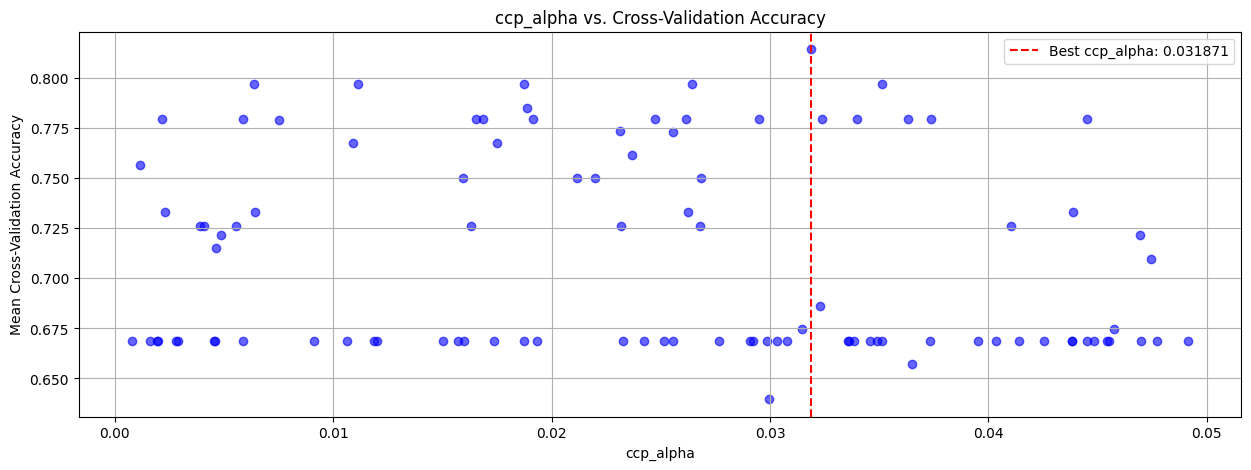

In [38]:
# Plot ccp_alpha vs. cross-validation scores (for visualization)
cv_results = random_search.cv_results_
ccp_alphas = [params['ccp_alpha'] for params in cv_results['params']]
mean_test_scores = cv_results['mean_test_score']
plt.figure(figsize=(15, 5))
plt.scatter(ccp_alphas, mean_test_scores, c='blue', alpha=0.6)
plt.axvline(x=best_params['ccp_alpha'], color='red', linestyle='--', label=f'Best ccp_alpha: {best_params["ccp_alpha"]:.6f}')
plt.xlabel('ccp_alpha')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('ccp_alpha vs. Cross-Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

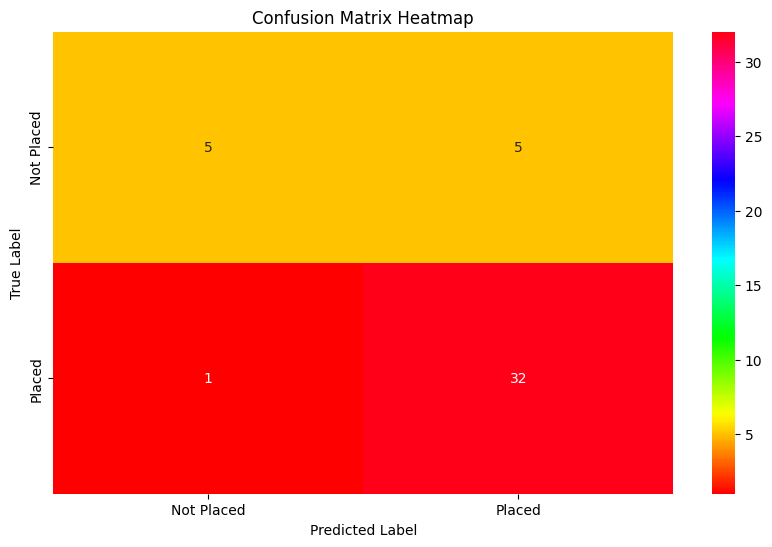

In [39]:
cm = confusion_matrix(y_test, y_pred)
label_name=["Not Placed","Placed"]
# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='hsv', xticklabels=label_name, yticklabels=label_name)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [40]:
report = classification_report(y_test, y_pred, target_names=label_name)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

  Not Placed       0.83      0.50      0.62        10
      Placed       0.86      0.97      0.91        33

    accuracy                           0.86        43
   macro avg       0.85      0.73      0.77        43
weighted avg       0.86      0.86      0.85        43



In [41]:
import pickle
file=open("decision_tree_classifier.pkl","wb")
pickle.dump(best_model,file)

In [42]:
! pip freeze

absl-py==1.4.0
accelerate==1.5.2
aiofiles==22.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.18
aiosignal==1.3.2
aiosqlite==0.21.0
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
alembic==1.15.2
altair==5.5.0
annotated-types==0.7.0
annoy==1.17.3
ansicolors==1.1.8
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
args==0.1.0
array_record==0.7.1
arrow==1.3.0
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.3.31.0.36.18
asttokens==3.0.0
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
bayesian-optimization==2.0.3
beartype==0.20.2
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.42.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.2.1
blobfile==3.0.0
blosc2==3.2.1
bokeh==3.6.3
Boruta==0.4.3
boto3==1.38.11
botocore==1.38.11
Bottleneck==1.4.2
-e git+https://github.com/SohierDane/BigQuery_Helper@8615a7f6c1663e7f2d48aa2b32c2dbcb600a440f#egg=bq_helper